In [48]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [49]:
data=pd.read_csv('AmazonReview.csv')
data.head()

,Review,Sentiment
0,Fast shipping but this product is very cheaply...,1
1,This case takes so long to ship and it's not e...,1
2,Good for not droids. Not good for iPhones. You...,1
3,The cable was not compatible between my macboo...,1
4,The case is nice but did not have a glow light...,1


In [50]:
data.shape

(25000, 2)

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     24999 non-null  object
 1   Sentiment  25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB


In [52]:
data.isnull().sum()

Review       1
Sentiment    0
dtype: int64

In [53]:
data.dropna(inplace=True)

In [54]:
data.isnull().sum()

Review       0
Sentiment    0
dtype: int64

Sentiment column has the value ranging from 1 to 5,
So let us consider a threshold for which sentiment values less than or equal to 3 is considered as negative and values greater than 3 is positive

In [55]:
#negative grouping
data.loc[data['Sentiment']<=3,'Sentiment']=0

#positive grouping
data.loc[data['Sentiment']>3,'Sentiment']=1

Let's remove stopwords

In [56]:
stop_words=stopwords.words('english')
def clean_review(review):
  cr=" ".join(word for word in review.split() if word not in stop_words)
  return cr
data['Review']=data['Review'].apply(clean_review)

In [57]:
data.head()

,Review,Sentiment
0,Fast shipping product cheaply made I brought g...,0
1,This case takes long ship even worth DONT BUY!!!!,0
2,Good droids. Not good iPhones. You cannot use ...,0
3,The cable compatible macbook iphone. Also conn...,0
4,The case nice glow light. I'm disappointed pro...,0


In [58]:
data['Sentiment'].value_counts()

0    15000
1     9999
Name: Sentiment, dtype: int64

let’s create the Wordcloud of all the words with sentiment = 0 i.e. negative and  sentiment = 1 i.e. positive

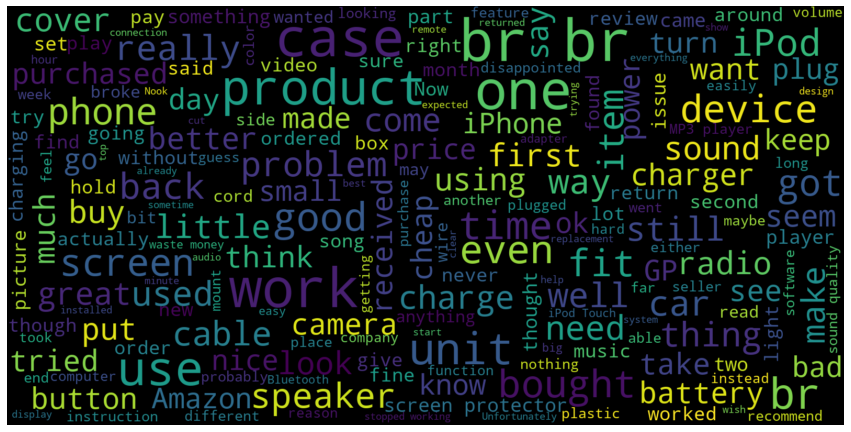

In [59]:
consolidated=' '.join(word for word in data['Review'][data['Sentiment']==0].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=42,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()


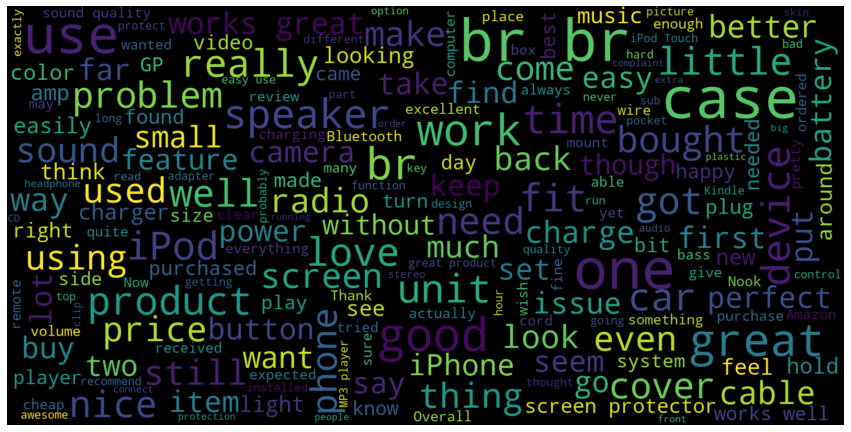

In [60]:
consolidated=' '.join(word for word in data['Review'][data['Sentiment']==1].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=42,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()

Converting text into Vectors

In [61]:
cv=TfidfVectorizer(max_features=2000)
X=cv.fit_transform(data['Review']).toarray()

Model building and prediction

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

X_train,X_test,y_train,y_test=train_test_split(X,data['Sentiment'],test_size=0.25,random_state=42)
model=LogisticRegression()
model.fit(X_train,y_train)


LogisticRegression()

In [63]:
ypred=model.predict(X_test)
print(accuracy_score(y_test,ypred))
print(classification_report(y_test,ypred))
print(confusion_matrix(y_test,ypred))

0.81296
              precision    recall  f1-score   support

           0       0.81      0.89      0.85      3718
           1       0.81      0.70      0.75      2532

    accuracy                           0.81      6250
   macro avg       0.81      0.80      0.80      6250
weighted avg       0.81      0.81      0.81      6250

[[3303  415]
 [ 754 1778]]


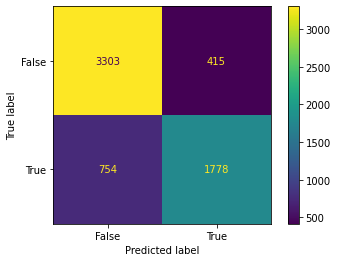

In [64]:

from sklearn import metrics
cm = confusion_matrix(y_test,ypred)
 
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,
                                            display_labels = [False, True])
 
cm_display.plot()
plt.show()

In [66]:
from sklearn.tree import DecisionTreeClassifier
  
model1 = DecisionTreeClassifier(random_state=42)
model1.fit(X_train,y_train)
  
#testing the model
ypred1 = model1.predict(X_test)
print(accuracy_score(y_test,ypred1))
print(classification_report(y_test,ypred1))
print(confusion_matrix(y_test,ypred1))

0.6912
              precision    recall  f1-score   support

           0       0.74      0.74      0.74      3718
           1       0.62      0.62      0.62      2532

    accuracy                           0.69      6250
   macro avg       0.68      0.68      0.68      6250
weighted avg       0.69      0.69      0.69      6250

[[2743  975]
 [ 955 1577]]


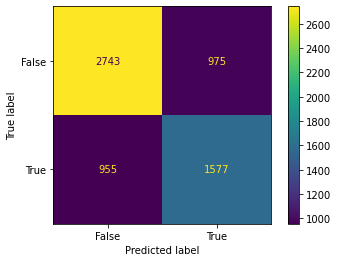

In [67]:

from sklearn import metrics
cm = confusion_matrix(y_test,ypred1)
 
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,
                                            display_labels = [False, True])
 
cm_display.plot()
plt.show()

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
model=RandomForestClassifier(n_estimators=500,criterion='entropy')
model.fit(X_train,y_train)
ypred2=model.predict(X_test)
print(accuracy_score(y_test,ypred2))
print(classification_report(y_test,ypred2))
print(confusion_matrix(y_test,ypred2))

0.79312
              precision    recall  f1-score   support

           0       0.80      0.87      0.83      3718
           1       0.78      0.67      0.73      2532

    accuracy                           0.79      6250
   macro avg       0.79      0.77      0.78      6250
weighted avg       0.79      0.79      0.79      6250

[[3248  470]
 [ 823 1709]]


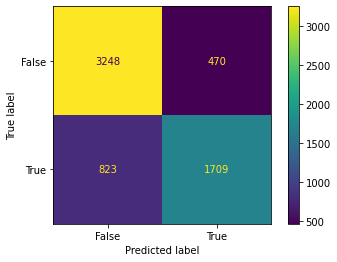

In [70]:

from sklearn import metrics
cm = confusion_matrix(y_test,ypred2)
 
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,
                                            display_labels = [False, True])
 
cm_display.plot()
plt.show()